In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='ISO-8859-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2315,ham,That's significant but dont worry.,NaN,NaN,NaN
2440,ham,"Great. I'm in church now, will holla when i ge...",NaN,NaN,NaN
1325,ham,Yeah jay's sort of a fucking retard,NaN,NaN,NaN
3713,ham,"Oh, i will get paid. The most outstanding one ...",NaN,NaN,NaN
1826,ham,Dude. What's up. How Teresa. Hope you have bee...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1- data cleaning
# 2-eda
# 3-text pre processing
# 4-model building
# 5-evaultaion
# 6- imporvement
# 7- website

DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop (columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [9]:
df.shape

(5572, 2)

In [10]:
df.sample(5)

,v1,v2
3965,ham,I was just callin to say hi. Take care bruv!
76,ham,Thats cool. i am a gentleman and will treat yo...
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...
3047,ham,Die... Now i have e toot fringe again...
1879,spam,U have a secret admirer who is looking 2 make ...


In [11]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
714,ham,He also knows about lunch menu only da. . I know
3470,ham,Heart is empty without love.. Mind is empty wi...
531,ham,What Today-sunday..sunday is holiday..so no wo...
4597,ham,I'm stuck in da middle of da row on da right h...
2625,spam,"FREE RING TONE just text \POLYS\"" to 87131. Th..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7e04298c4250>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

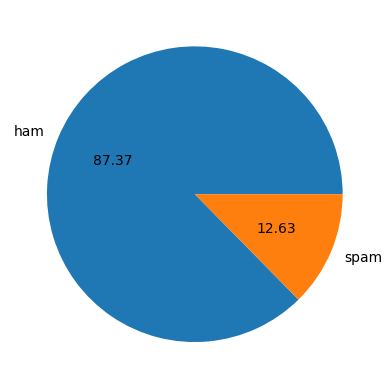

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')

#DATA is imbalanced 

In [22]:
!pip3 install nltk

In [23]:
import nltk


In [24]:
# nltk.download('punkt')

In [25]:
df['num_characters']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) 

In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [31]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [32]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [33]:
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

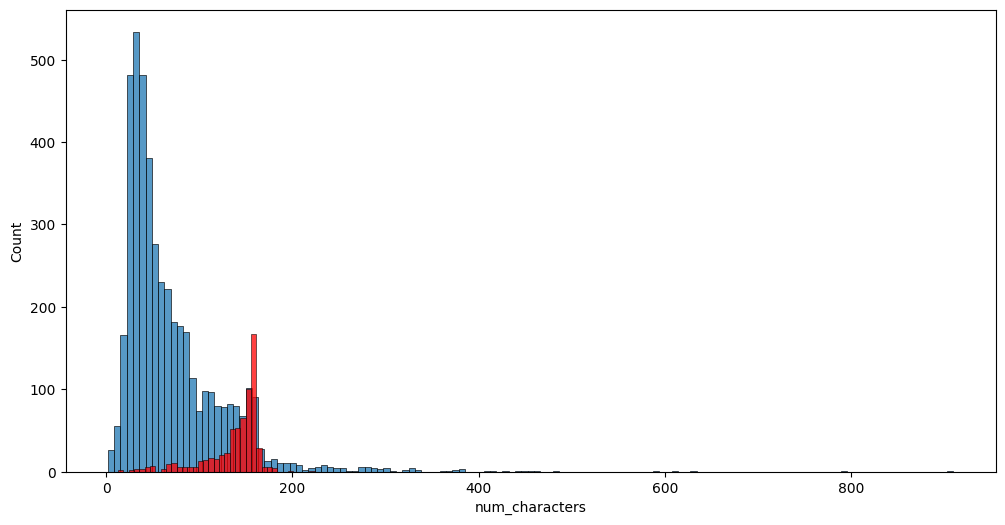

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

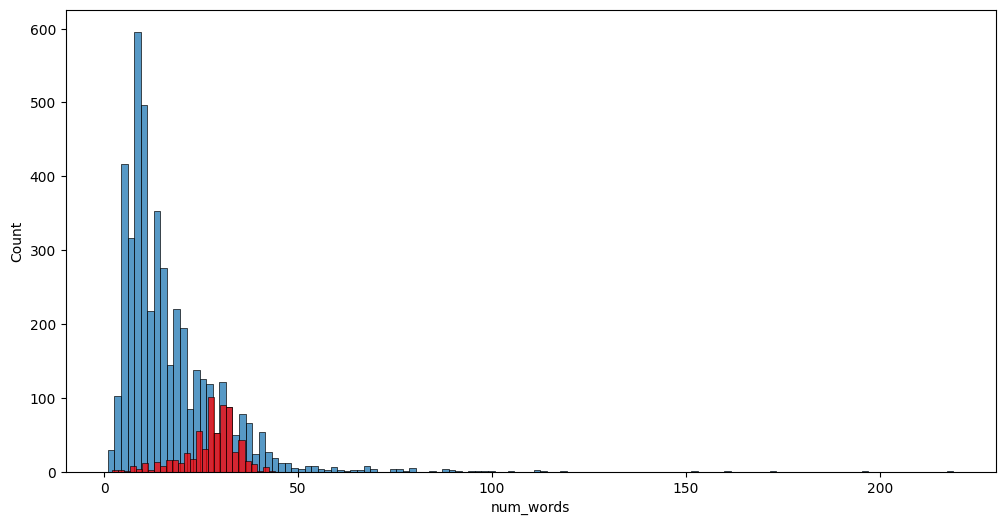

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

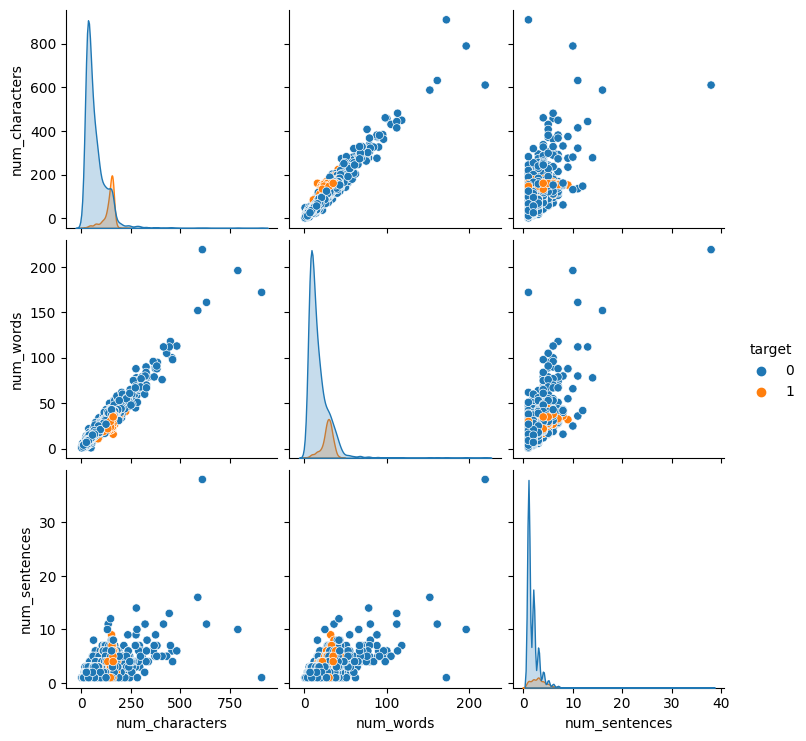

In [36]:
sns.pairplot(df,hue='target')

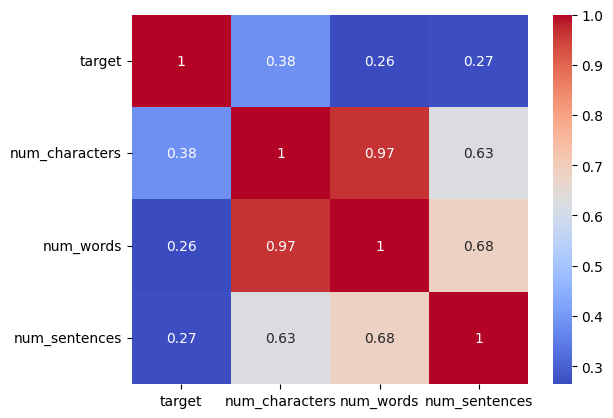

In [37]:
selected_columns = ['target', 'num_characters','num_words','num_sentences']  
corr_matrix = df[selected_columns].corr()  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  
plt.show()

# sns.heatmap(df.corr(), annot = True)

In [38]:
# data Preprocessing
# -lower case
# -tokenization
# -removing special char
# -removing stop words and punctuation
# -stemming

In [39]:
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# import string

from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

ps = PorterStemmer()

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Ensure necessary NLTK data is available
nltk.download('stopwords')
nltk.download('punkt')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

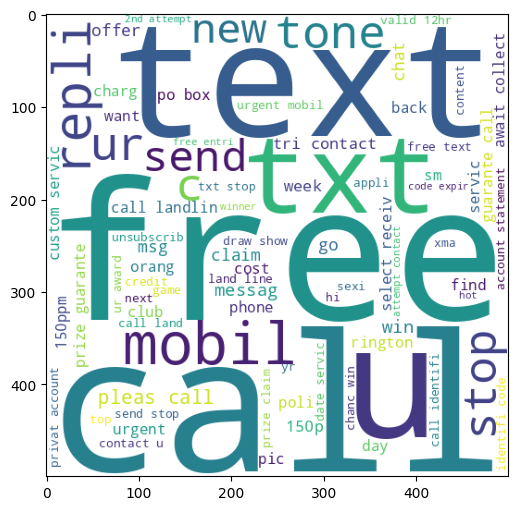

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

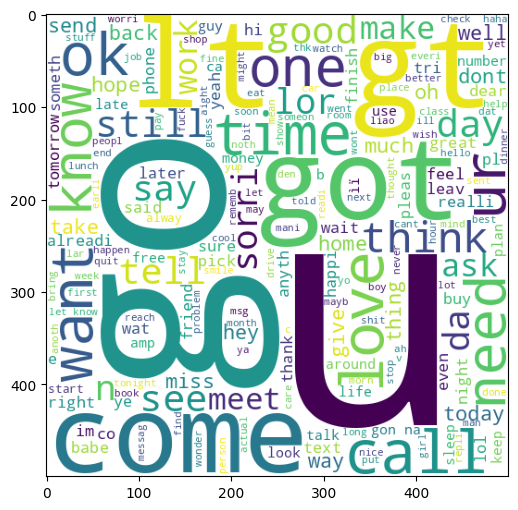

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9883

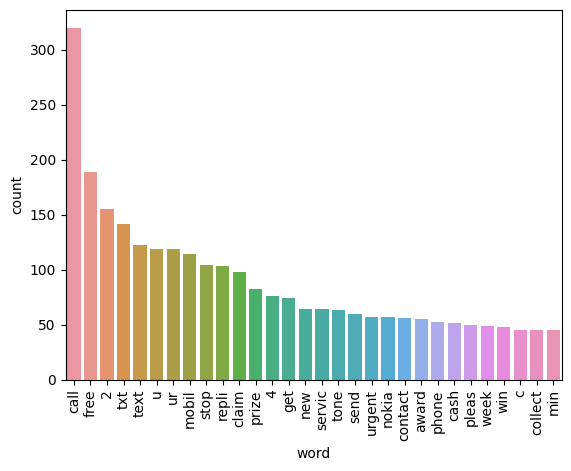

In [51]:
from collections import Counter

common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

34771

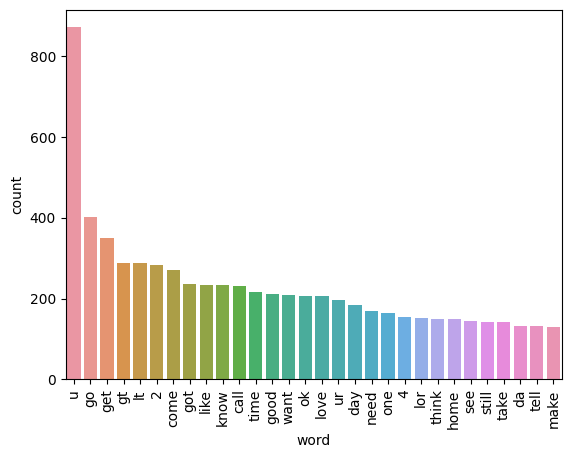

In [54]:
from collections import Counter

common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Model Building


In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [57]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [58]:
X.shape

(5169, 3000)

In [59]:
y = df['target'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred1))
print('confusion_matrix',confusion_matrix(y_test,y_pred1))
print('precision_score',precision_score(y_test,y_pred1))


accuracy_score 0.867504835589942
confusion_matrix [[785 111]
 [ 26 112]]
precision_score 0.5022421524663677


In [65]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred2))
print('confusion_matrix',confusion_matrix(y_test,y_pred2))
print('precision_score',precision_score(y_test,y_pred2))

accuracy_score 0.9729206963249516
confusion_matrix [[896   0]
 [ 28 110]]
precision_score 1.0


In [66]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred3))
print('confusion_matrix',confusion_matrix(y_test,y_pred3))
print('precision_score',precision_score(y_test,y_pred3))

accuracy_score 0.9816247582205029
confusion_matrix [[895   1]
 [ 18 120]]
precision_score 0.9917355371900827


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , BaggingClassifier , ExtraTreesClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators =50 , random_state=2)
abc = AdaBoostClassifier(n_estimators =50 , random_state=2)
bc = BaggingClassifier(n_estimators =50 , random_state=2)
etc = ExtraTreesClassifier(n_estimators =50 , random_state=2)
gdbt = GradientBoostingClassifier(n_estimators =50 , random_state=2)
xgb = XGBClassifier(n_estimators =50 , random_state=2)

In [69]:
clfs = {
    'svc': svc,
    'knc':knc,
    'mnb':mnb,
    'dtc': dtc,
    'lrc':lrc,
    'rfc':rfc,
    'abc':abc,
    'bc':bc,
    'etc':etc,
    'gdbt':gdbt,
    'xgb':xgb
}

In [70]:
def train_classifier(clf, X_train , y_train , X_test , y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy , precision 

In [71]:
train_classifier(svc,X_train,y_train,X_test, y_test)

(0.9748549323017408, 0.9666666666666667)

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(int(current_accuracy ))
    precision_scores.append(int(current_precision))

For  svc
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  knc
Accuracy -  0.9052224371373307
Precision -  1.0
For  mnb
Accuracy -  0.9729206963249516
Precision -  1.0
For  dtc
Accuracy -  0.9284332688588007
Precision -  0.826530612244898
For  lrc
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  rfc
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  abc
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  bc
Accuracy -  0.9545454545454546
Precision -  0.8527131782945736
For  etc
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  gdbt
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9243697478991597


In [91]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_score, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [92]:
performance_df

,Algorithm,Accuracy,Precision
1,knc,<function accuracy_score at 0x7e042739cb80>,1
2,mnb,<function accuracy_score at 0x7e042739cb80>,1
0,svc,<function accuracy_score at 0x7e042739cb80>,0
3,dtc,<function accuracy_score at 0x7e042739cb80>,0
4,lrc,<function accuracy_score at 0x7e042739cb80>,0
5,rfc,<function accuracy_score at 0x7e042739cb80>,0
6,abc,<function accuracy_score at 0x7e042739cb80>,0
7,bc,<function accuracy_score at 0x7e042739cb80>,0
8,etc,<function accuracy_score at 0x7e042739cb80>,0
9,gdbt,<function accuracy_score at 0x7e042739cb80>,0


In [93]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [94]:
performance_df1

,Algorithm,variable,value
0,knc,Accuracy,<function accuracy_score at 0x7e042739cb80>
1,mnb,Accuracy,<function accuracy_score at 0x7e042739cb80>
2,svc,Accuracy,<function accuracy_score at 0x7e042739cb80>
3,dtc,Accuracy,<function accuracy_score at 0x7e042739cb80>
4,lrc,Accuracy,<function accuracy_score at 0x7e042739cb80>
5,rfc,Accuracy,<function accuracy_score at 0x7e042739cb80>
6,abc,Accuracy,<function accuracy_score at 0x7e042739cb80>
7,bc,Accuracy,<function accuracy_score at 0x7e042739cb80>
8,etc,Accuracy,<function accuracy_score at 0x7e042739cb80>
9,gdbt,Accuracy,<function accuracy_score at 0x7e042739cb80>


In [96]:
def replace_functions(value):
    if callable(value) or isinstance(value, str) and 'function' in value:  
        return 1 
    return value 

In [97]:
performance_df1['value'] = performance_df1['value'].apply(replace_functions)


In [98]:
performance_df1['value'] = pd.to_numeric(performance_df1['value'], errors='coerce')


In [99]:
performance_df1

,Algorithm,variable,value
0,knc,Accuracy,1
1,mnb,Accuracy,1
2,svc,Accuracy,1
3,dtc,Accuracy,1
4,lrc,Accuracy,1
5,rfc,Accuracy,1
6,abc,Accuracy,1
7,bc,Accuracy,1
8,etc,Accuracy,1
9,gdbt,Accuracy,1


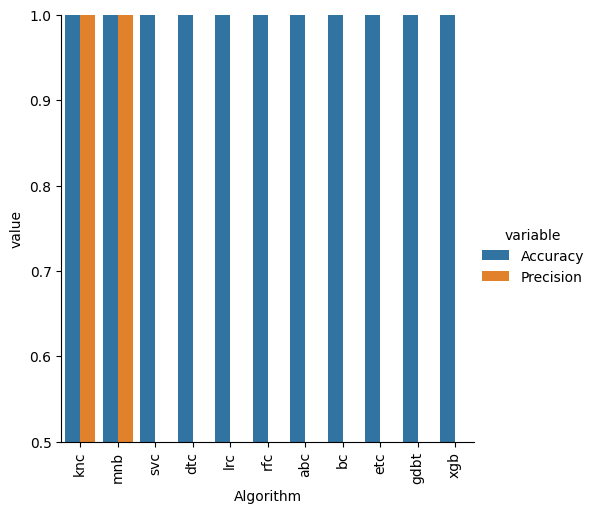

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.catplot(
    x='Algorithm',  
    y='value',      
    hue='variable',
    data=performance_df1,
    kind='bar',
    height=5
)

plt.ylim(0.5, 1.0)  # This will set the y-axis limits
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically for better readability
plt.show()


In [101]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [102]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [103]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [105]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [109]:

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [110]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [111]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [112]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.975609756097561


In [113]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [114]:
from sklearn.ensemble import StackingClassifier

In [115]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [116]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832
